# For processing

In [3]:
from BeatNet.BeatNet import BeatNet
import pickle as pkl
import os

estimator = BeatNet(1, mode='offline', inference_model='DBN', plot=[], thread=False)


directory = os.fsencode('inputs/')

data = {}
with open("beat_data.pkl","rb") as f:
    data = pkl.load(f)

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".wav") or filename.endswith(".mp3"): 
        name = filename[:-4]
        if name not in data:
            data[name] = estimator.process("inputs/" + filename)
        else:
            print(f"Name '{name}' already exists!  Not processed.")

with open("beat_data.pkl","wb+") as f:
    pkl.dump(data, f)

Name 'awakening' already exists!  Not processed.
Name 'fengs' already exists!  Not processed.
Name 'lms' already exists!  Not processed.


/home/harrison/erdos/groove_gang/beatnet/venv/lib/python3.12/site-packages/BeatNet/BeatNet.py:74: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(to

# For loading

In [2]:
import pickle as pkl

with open("beat_data.pkl","rb") as f:
    data = pkl.load(f)

data.keys()

dict_keys(['fengs', 'lms', '100bpm', 'awakening'])

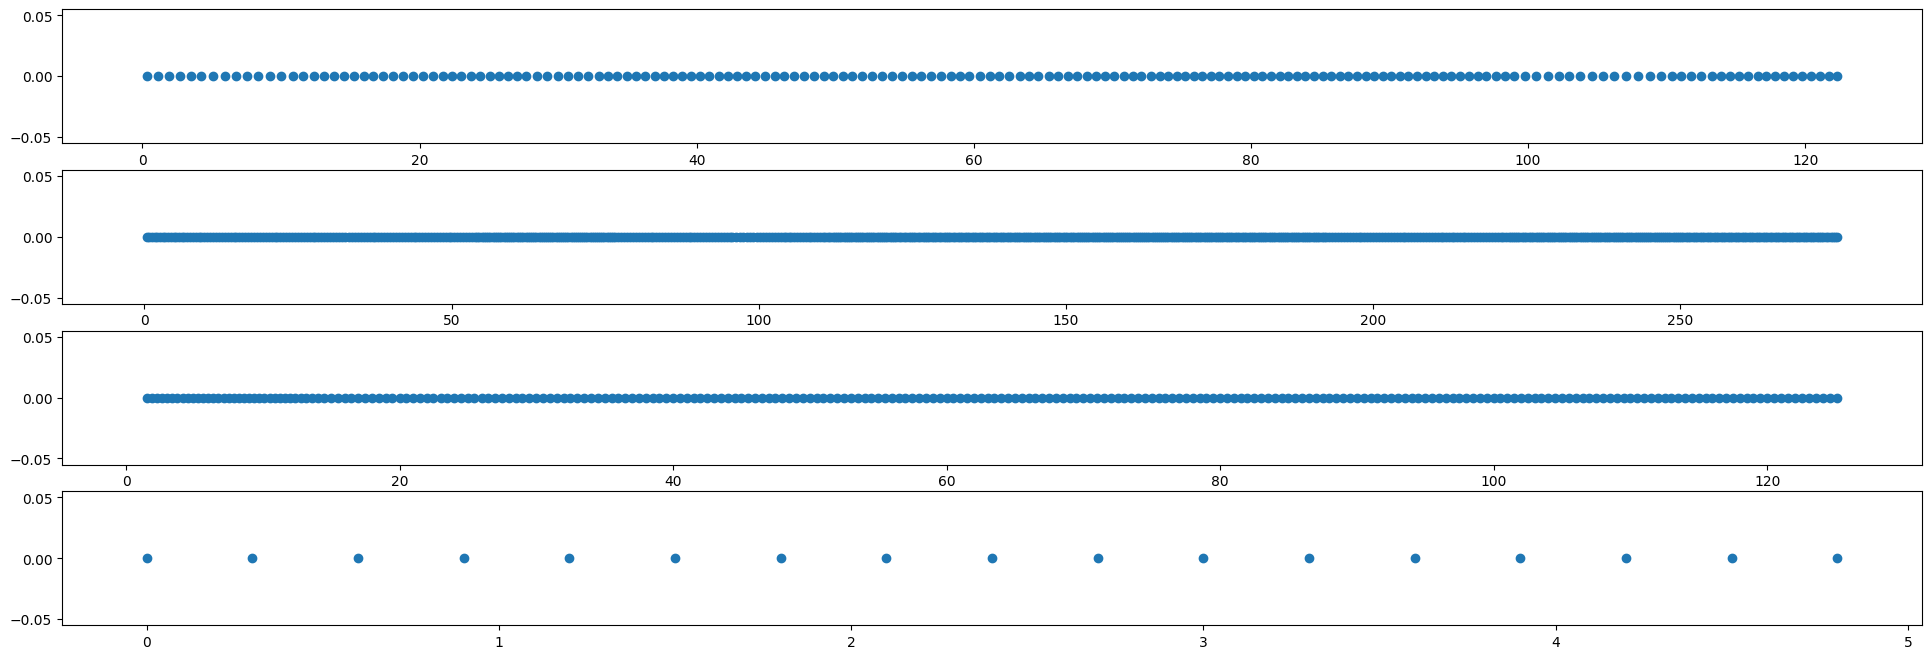

In [14]:
import matplotlib.pyplot as plt
import numpy as np

_, ax = plt.subplots(figsize=(24,8), nrows=4, ncols=1)
ax[0].scatter(data['awakening'][:,0], np.zeros(data['awakening'].shape[0]), marker='o')
ax[1].scatter(data['fengs'][:,0], np.zeros(data['fengs'].shape[0]), marker='o')
ax[2].scatter(data['lms'][:,0], np.zeros(data['lms'].shape[0]), marker='o')
ax[3].scatter(data['100bpm'][:,0], np.zeros(data['100bpm'].shape[0]), marker='o')


# For testing

In [21]:
from BeatNet.BeatNet import BeatNet

estimator = BeatNet(1, mode='offline', inference_model='DBN', plot=[], thread=False)

estimator.process("inputs/awakening.mp3")



/home/harrison/erdos/groove_gang/beatnet/venv/lib/python3.12/site-packages/BeatNet/BeatNet.py:74: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(to

array([[  0.3 ,   3.  ],
       [  1.1 ,   1.  ],
       [  1.9 ,   2.  ],
       [  2.7 ,   3.  ],
       [  3.48,   1.  ],
       [  4.26,   2.  ],
       [  5.08,   3.  ],
       [  5.94,   1.  ],
       [  6.76,   2.  ],
       [  7.58,   3.  ],
       [  8.36,   1.  ],
       [  9.18,   2.  ],
       [ 10.  ,   3.  ],
       [ 10.86,   1.  ],
       [ 11.62,   2.  ],
       [ 12.4 ,   3.  ],
       [ 13.12,   1.  ],
       [ 13.86,   2.  ],
       [ 14.58,   3.  ],
       [ 15.3 ,   1.  ],
       [ 16.  ,   2.  ],
       [ 16.66,   3.  ],
       [ 17.36,   1.  ],
       [ 18.06,   2.  ],
       [ 18.8 ,   3.  ],
       [ 19.5 ,   1.  ],
       [ 20.24,   2.  ],
       [ 20.94,   3.  ],
       [ 21.68,   1.  ],
       [ 22.32,   2.  ],
       [ 23.  ,   3.  ],
       [ 23.7 ,   1.  ],
       [ 24.38,   2.  ],
       [ 25.06,   3.  ],
       [ 25.76,   1.  ],
       [ 26.4 ,   2.  ],
       [ 27.06,   3.  ],
       [ 27.7 ,   1.  ],
       [ 28.48,   2.  ],
       [ 29.2 ,   3.  ],


# For playing

Need to load data (above) first

In [13]:
import numpy as np
from IPython.display import Audio
import librosa

file = 'lms'

y, sr = librosa.load(f'inputs/{file}.mp3')

# Make a basic metronome
met = librosa.clicks(times=data[file][:,0], sr=sr)
met = np.concatenate([met, np.zeros(y.shape[0] - met.shape[0])])
y_met = met + y
# Triple the magnitude on downbeats
dbs = data[file][data[file][:,1] == 1,0]
db_met = librosa.clicks(times=dbs, sr=sr)
db_met = np.concatenate([db_met, np.zeros(y.shape[0] - db_met.shape[0])])
y_met = 2 * db_met + y_met

Audio(data=y_met, rate=sr)


